# Part 1. Initial assignment exploration

## CIFAR-10 Data Loading and Preprocessing 

In this week, we will be using thie CIFAR-10 dataset. Instead of drawing the data from an existing source, we will work with the initial release from the [site where CIFAR-10 is hosted](https://www.cs.toronto.edu/~kriz/cifar.html). Sufficient documentation should be present in the page. Instead of extracting the data manually with your mouse, first, write a simple script to download, extract and move the data into a appropriate folder. Also spare a thought for how you might want to not store this data in your git repository.

In [1]:
import numpy as np
import os
import wget
import pickle
import tarfile
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
path  = 'data/cifar.tar.gz'
if not os.path.exists(path):
    print('start download cifar-10 dataset...')
    wget.download('https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz', out=path)

tar = tarfile.open('data/cifar.tar.gz', "r:gz")
tar.extractall()
tar.close()

start download cifar-10 dataset...
100% [......................................................................] 170498071 / 170498071

Next, write a simple script to load and transform multiple pieces of the dataset into a simple vector stored in memory. You should end with both train and test data. You can also split the data into train, val, and test sets. 

In [3]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch1 = unpickle('cifar-10-batches-py/data_batch_1')
batch2 = unpickle('cifar-10-batches-py/data_batch_2')
batch3 = unpickle('cifar-10-batches-py/data_batch_3')
batch4 = unpickle('cifar-10-batches-py/data_batch_4')
batch5 = unpickle('cifar-10-batches-py/data_batch_5')

train_val = np.concatenate([batch1[b'data'],batch2[b'data'],batch3[b'data'],batch4[b'data'],batch5[b'data']],axis=0)
train_val_labels = batch1[b'labels']+batch2[b'labels']+batch3[b'labels']+batch4[b'labels']+batch5[b'labels']

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_val, train_val_labels, test_size=0.2, random_state=42)

testset = unpickle('cifar-10-batches-py/test_batch')
x_test = testset[b'data']
y_test = testset[b'labels']

Finally, visualize some examples from the dataset. For each label class present, visualise a few images at random to see what our data looks like. Depending on the data type, you also may need to do some image pre-processing by reshaping the image data into rows.

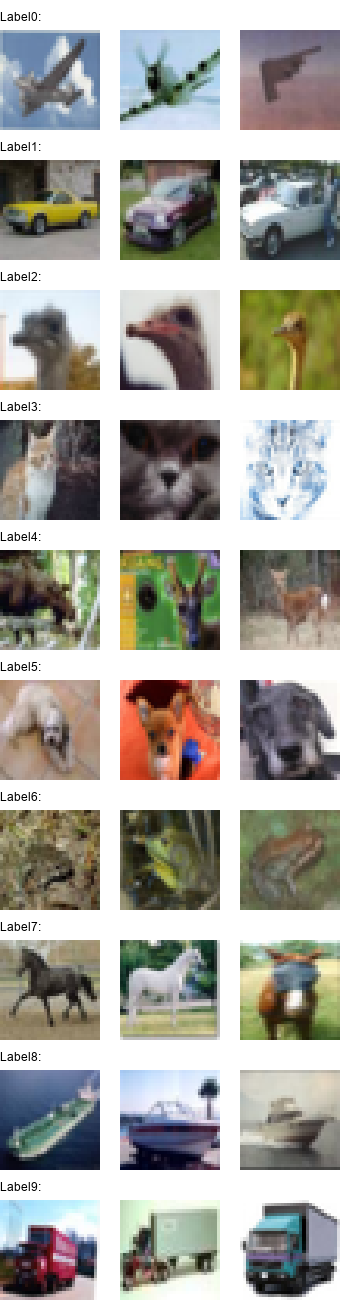

In [4]:
import random
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

random.seed(1)




new_im = Image.new('RGB', (340, 1300),'white')
draw = ImageDraw.Draw(new_im)
#font = ImageFont.load("arial.pil")
font = ImageFont.truetype("arial.ttf", 12)
y_offset = 30
for n in range(10):
    x_offset = 0
    
    idx_list = [idx for idx,x in enumerate(y_train) if x == n]
    sel_idx = random.sample(idx_list, 3)    

    full=[]
    for idx in sel_idx:
        red = x_train[idx,:1024]
        red = red.reshape(32,32)
        green= x_train[idx,1024:2048]
        green = green.reshape(32,32)
        blue= x_train[idx,2048:]
        blue = blue.reshape(32,32)
        full.append(np.dstack((red,green,blue)))

   
    for i in range(3):
        img = Image.fromarray(full[i], 'RGB')
        im = img.resize((100,100))
        new_im.paste(im, (x_offset,y_offset))
        x_offset += 120
    draw.text((0, y_offset-20),'Label'+str(n)+': ',(0,0,0),font=font)
    y_offset += 130

new_im

## k-Nearest Neighbor (kNN) exercise

In here, you will need to implement a KNN (K-nearest neighbours) classifier for the CIFAR-10 dataset. Apply best k-fold cross validation to find the best K and L (Euclidean or Manhattan distance) pair by plotting the resulting average accuracies and standard deviations and choosing the pair which produces the highest average accuracy first and lowest standard deviation second. Use this pair to find the accuracy per class and average accuracy on the testing set. Find out if grayscalse would produce a better accuracy than colored.

The kNN classifier consists of two stages:

- During training, the classifier takes the training data and simply remembers it
- During testing, kNN classifies every test image by comparing to all training images and transfering the labels of the k most similar training examples
- The value of k is cross-validated

In this part of exercise, you will implement these steps and understand the basic image classification pipeline, cross-validation, and gain proficiency in writing efficient, vectorized code.

As a bonus, you may also wish to try manually creating features that you can put into such a classifier.

#### Grid Search

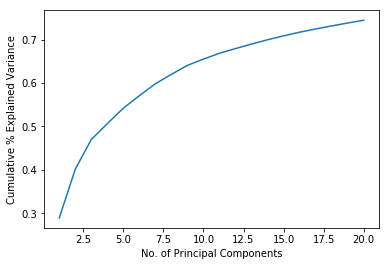

In [22]:
from sklearn.decomposition import PCA
random.seed(1)

sel_idx = random.sample(list(range(train_val.shape[0])), 10000)
x_knn = train_val[sel_idx]
y_knn = [train_val_labels[idx] for idx in sel_idx]

pca = PCA(n_components=20,random_state=1)
pca.fit(x_knn)

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.plot(list(range(1,21)),np.cumsum(pca.explained_variance_ratio_))
x_axis = plt.xlabel('No. of Principal Components')
y_axis = plt.ylabel('Cumulative % Explained Variance')
plt.show()

In [23]:
x_knn = pca.transform(x_knn)
x_knn.shape

(10000, 20)

In [ ]:
# knn0 = KNeighborsClassifier()
# parameters = {'n_neighbors':[5,10,15,20],'p':[1,2]}
# knn = GridSearchCV(knn0, parameters, scoring='accuracy', cv= 5)
# knn.fit(x_knn,y_knn)

In [ ]:
#knn.cv_results_

In [ ]:
# import pandas as pd
# res =pd.DataFrame.from_dict(knn.cv_results_)
# res.to_csv('knn/knn_10000n_10p.csv',index=False,header=True)

### Evaluation and Visualization

Provide some reporting and visualization of KNN results in CIFAR-10

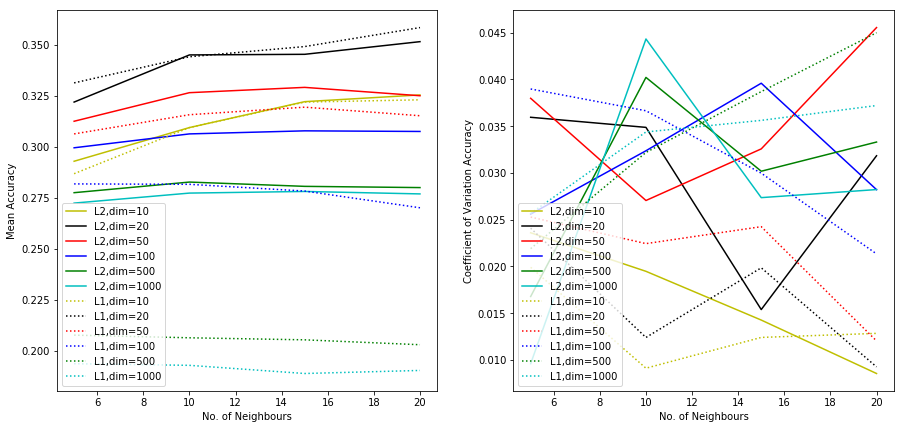

In [24]:
import pandas as pd

p10 = pd.read_csv('knn/knn_10000n_10p.csv')
p20 = pd.read_csv('knn/knn_10000n_20p.csv')
p50 = pd.read_csv('knn/knn_10000n_50p.csv')
p100 = pd.read_csv('knn/knn_10000n_100p.csv')
p500 = pd.read_csv('knn/knn_10000n_500p.csv')
p1000 = pd.read_csv('knn/knn_10000n_1000p.csv')

import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(1,2,figsize=(15, 7))

ax[0].plot([5,10,15,20],p10.loc[p10['param_p']==2,'mean_test_score'],'y-',label='L2,dim=10')
ax[0].plot([5,10,15,20],p20.loc[p20['param_p']==2,'mean_test_score'],'k-',label='L2,dim=20')
ax[0].plot([5,10,15,20],p50.loc[p50['param_p']==2,'mean_test_score'],'r-',label='L2,dim=50')
ax[0].plot([5,10,15,20],p100.loc[p100['param_p']==2,'mean_test_score'],'b-',label='L2,dim=100')
ax[0].plot([5,10,15,20],p500.loc[p500['param_p']==2,'mean_test_score'][:4],'g-',label='L2,dim=500')
ax[0].plot([5,10,15,20],p1000.loc[p1000['param_p']==2,'mean_test_score'][:4],'c-',label='L2,dim=1000')

ax[0].plot([5,10,15,20],p10.loc[p10['param_p']==1,'mean_test_score'],'y:',label='L1,dim=10')
ax[0].plot([5,10,15,20],p20.loc[p20['param_p']==1,'mean_test_score'],'k:',label='L1,dim=20')
ax[0].plot([5,10,15,20],p50.loc[p50['param_p']==1,'mean_test_score'],'r:',label='L1,dim=50')
ax[0].plot([5,10,15,20],p100.loc[p100['param_p']==1,'mean_test_score'],'b:',label='L1,dim=100')
ax[0].plot([5,10,15,20],p500.loc[p500['param_p']==1,'mean_test_score'][:4],'g:',label='L1,dim=500')
ax[0].plot([5,10,15,20],p1000.loc[p1000['param_p']==1,'mean_test_score'][:4],'c:',label='L1,dim=1000')

x_axis = ax[0].set_xlabel('No. of Neighbours')
y_axis = ax[0].set_ylabel('Mean Accuracy')
ax[0].legend(loc=3)

ax[1].plot([5,10,15,20],p10.loc[p10['param_p']==2,'std_test_score']/p10.loc[p10['param_p']==2,'mean_test_score'],'y-',label='L2,dim=10')
ax[1].plot([5,10,15,20],p20.loc[p20['param_p']==2,'std_test_score']/p20.loc[p20['param_p']==2,'mean_test_score'],'k-',label='L2,dim=20')
ax[1].plot([5,10,15,20],p50.loc[p50['param_p']==2,'std_test_score']/p50.loc[p50['param_p']==2,'mean_test_score'],'r-',label='L2,dim=50')
ax[1].plot([5,10,15,20],p100.loc[p100['param_p']==2,'std_test_score']/p100.loc[p100['param_p']==2,'mean_test_score'],'b-',label='L2,dim=100')
ax[1].plot([5,10,15,20],p500.loc[p500['param_p']==2,'std_test_score'][:4]/p500.loc[p500['param_p']==2,'mean_test_score'][:4],'g-',label='L2,dim=500')
ax[1].plot([5,10,15,20],p1000.loc[p1000['param_p']==2,'std_test_score'][:4]/p1000.loc[p1000['param_p']==2,'mean_test_score'][:4],'c-',label='L2,dim=1000')

ax[1].plot([5,10,15,20],p10.loc[p10['param_p']==1,'std_test_score']/p10.loc[p10['param_p']==1,'mean_test_score'],'y:',label='L1,dim=10')
ax[1].plot([5,10,15,20],p20.loc[p20['param_p']==1,'std_test_score']/p20.loc[p20['param_p']==1,'mean_test_score'],'k:',label='L1,dim=20')
ax[1].plot([5,10,15,20],p50.loc[p50['param_p']==1,'std_test_score']/p50.loc[p50['param_p']==1,'mean_test_score'],'r:',label='L1,dim=50')
ax[1].plot([5,10,15,20],p100.loc[p100['param_p']==1,'std_test_score']/p100.loc[p100['param_p']==1,'mean_test_score'],'b:',label='L1,dim=100')
ax[1].plot([5,10,15,20],p500.loc[p500['param_p']==1,'std_test_score'][:4]/p500.loc[p500['param_p']==1,'mean_test_score'][:4],'g:',label='L1,dim=500')
ax[1].plot([5,10,15,20],p1000.loc[p1000['param_p']==1,'std_test_score'][:4]/p1000.loc[p1000['param_p']==1,'mean_test_score'][:4],'c:',label='L1,dim=1000')

x_axis = ax[1].set_xlabel('No. of Neighbours')
y_axis = ax[1].set_ylabel('Coefficient of Variation Accuracy')
ax[1].legend(loc=3)

plt.show() 

<span style="color:#003366"><b> Using PCA to reduce dimensionality of image matrix to reduce computation cost and improve performance of KNN (avoiding curse of dimensionality). 20 principal components performs the best using 20 neighbours and L1 distance with a clear highest mean accuracy and a very close 3rd lowest coefficient of variation accuracy (0.093 vs 0.086,0.091) for CV=5. 

### RGB Images

In [15]:
from sklearn.decomposition import PCA
random.seed(1)

x_knn = train_val
y_knn = train_val_labels

pca = PCA(n_components=20,random_state=1)
pca.fit(x_knn)

x_knn = pca.transform(x_knn)
print('train set:',x_knn.shape)

x_test2 = pca.transform(x_test)
print('test set:',x_test2.shape)

train set: (50000, 20)
test set: (10000, 20)


In [16]:
knn_best = KNeighborsClassifier(n_neighbors=20,p=1)
knn_best.fit(x_knn,y_knn)
pred = knn_best.predict(x_test2)
#pd.DataFrame(pred).to_csv('knn/pred.csv',index=False)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Average Accuracy: ',accuracy_score(y_test,pred))
print()

Average Accuracy:  0.4228



In [17]:
cm = confusion_matrix(y_test, pred)
pd.DataFrame(cm.diagonal()/[np.sum(np.array(y_test)==i) for i in list(range(10))]*100,columns = ['Accuracy'])

,Accuracy
0,57.5
1,41.2
2,40.5
3,20.1
4,42.5
5,26.7
6,58.2
7,37.6
8,62.7
9,35.8


### Greyscale Images

In [18]:
def gray(data):
    red = data[:,:1024]
    green = data[:,1024:2048]
    blue = data[:,2048:3072]
    return red*0.299 + green*0.587 + blue*0.114 

In [19]:
from sklearn.decomposition import PCA
random.seed(1)

x_knn2 = gray(train_val)
y_knn2 = train_val_labels

pca = PCA(n_components=20,random_state=1)
pca.fit(x_knn2)

x_knn2 = pca.transform(x_knn2)
print('train set:',x_knn2.shape)

x_test3 = pca.transform(gray(x_test))
print('test set:',x_test3.shape)

train set: (50000, 20)
test set: (10000, 20)


In [20]:
knn_best = KNeighborsClassifier(n_neighbors=20,p=1)
knn_best.fit(x_knn2,y_knn2)
pred = knn_best.predict(x_test3)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Average Accuracy: ',accuracy_score(y_test,pred))
print()

Average Accuracy:  0.3651



In [21]:
import pandas as pd
cm = confusion_matrix(y_test, pred)
pd.DataFrame(cm.diagonal()/[np.sum(np.array(y_test)==i) for i in list(range(10))]*100,columns = ['Accuracy'])

,Accuracy
0,46.3
1,34.6
2,41.6
3,14.3
4,40.5
5,21.7
6,48.2
7,31.6
8,56.6
9,29.7


<span style="color:#003366"><b> For consistency in accuracy comparison, grayscale images was also reduced to 20 dimensions using PCA and trained using the same KNN parameters. Grayscale images (36.5% accuracy) did not perform better compared to RGB images (42.2% accuracy). Color information helps in the classification task eg. Planes(class 0) and ships (class 8) are usually found in blue/white background.